In [1]:
!pip install pickle5

     |████████████████████████████████| 133kB 6.9MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219264 sha256=50d69db005662952a0bc2bc1533e82803d8090dcfb38c20a78245ffaadf59de0
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
import matplotlib.pyplot as plt
import pickle5 as pickle
import numpy as np

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def histogram(x,label,dpi,fig_size,log):
    plt.figure(figsize=fig_size,dpi=dpi)
    n_bins = max(x)-min(x)+1
    n, _ = np.histogram(x, bins=n_bins)
    plt.bar([min(x)+y for y in range(n_bins)],n,log=log)
    
    plt.xlabel(label)
    plt.ylabel('count')
    # plt.savefig(destination_folder+'HISTOGRAM_'+dataset+'_.png',transparent=True,dpi=dpi,pad_inches=0.1,bbox_inches='tight')
    plt.show()

def bars(y,labels,dpi,fig_size):
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_size)
    fig.set_dpi(dpi)

    x = np.arange(len(y))
    ax.barh(x,y,0.5)

    ax.set_xlabel('Score')
    # ax.set_title('Scores by epoch and type')
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    # ax.legend()

    plt.show()

In [ ]:
print(data['best_val_loss']) # baseline

0.1470120484324286


In [ ]:
print(data['best_val_loss']) 

0.3686203527117923


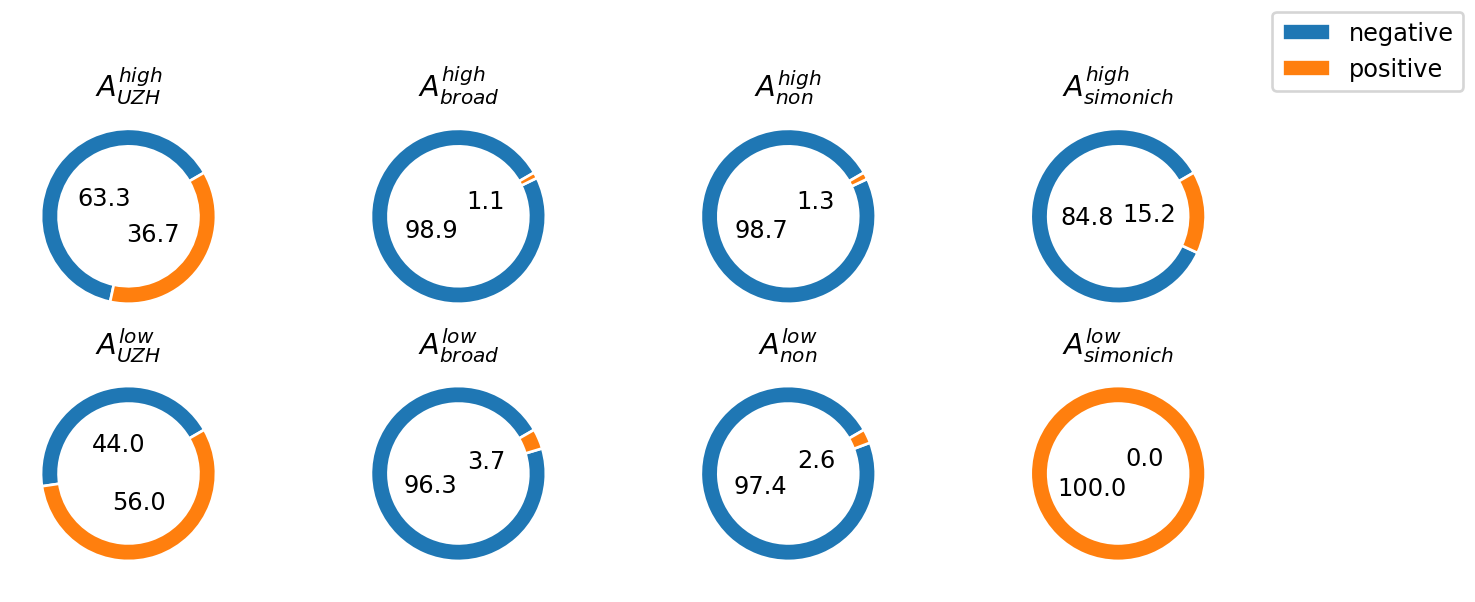

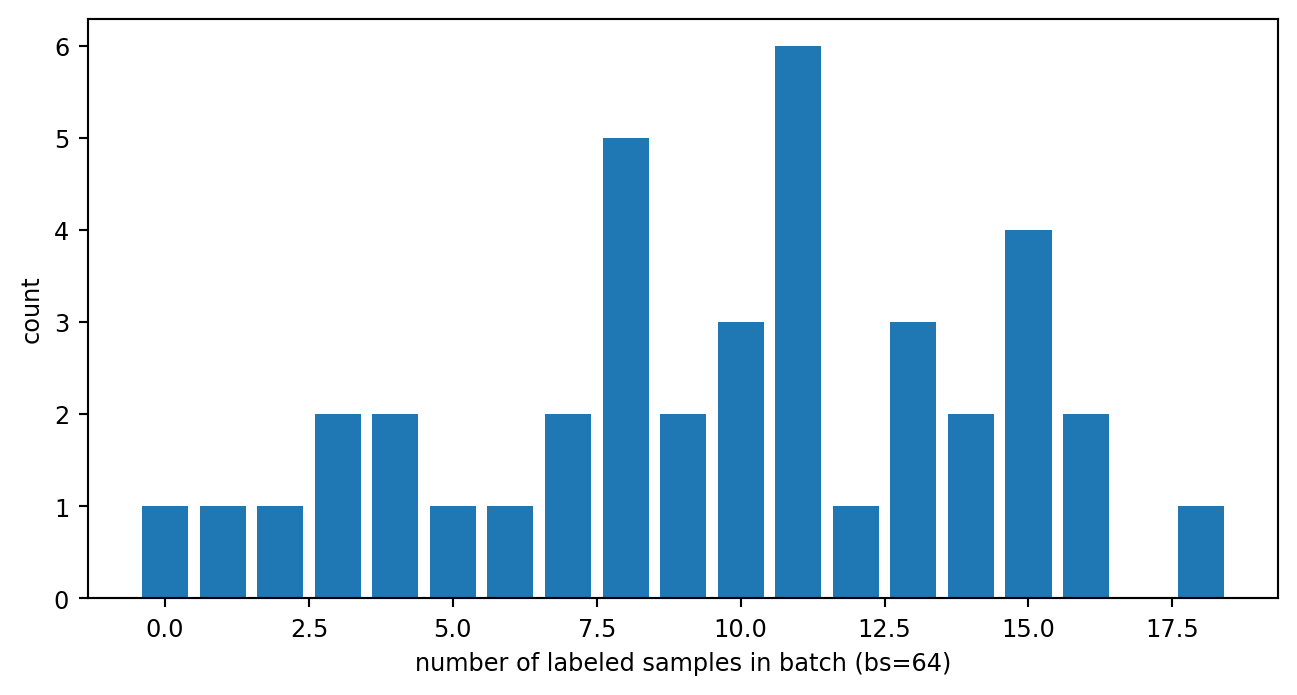

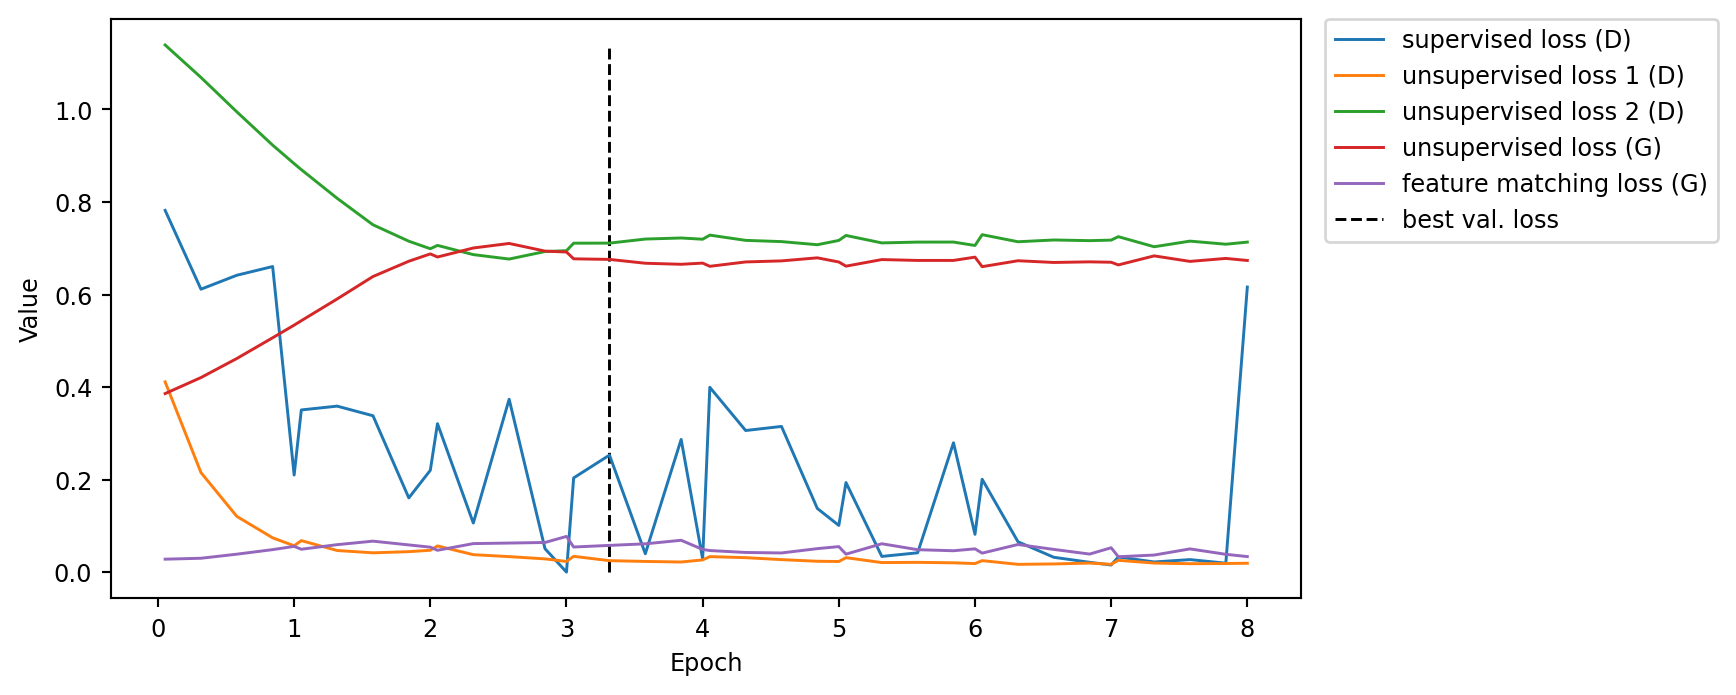

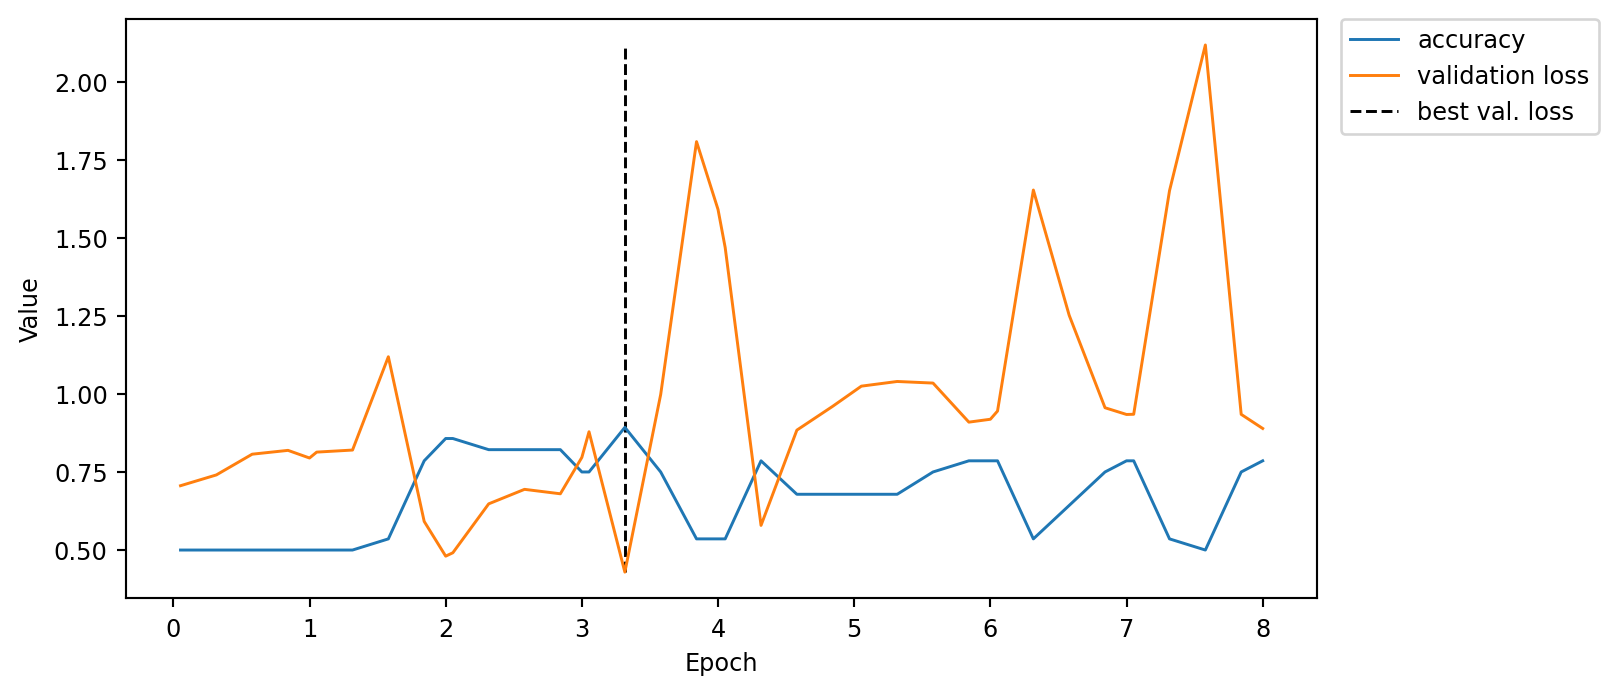

In [3]:
file_to_plot = 'STATISTICS_trained_on=[[baseline+UZH_labeled_non]_[5_lab=unlab]_[no_rep]]_params=[baseline]'
file_to_plot_pretrained = file_to_plot+'_using_pretrained'

dpi = 96*2
sample_every = 1
fig_size = (8,4)
linewidth = 1.1
prop_to_show = 1
show_save_pt = True
show_ma = False
ma_n = 50
plot_log_y = [False,False]

data = load_obj(file_to_plot_pretrained)

# y = [data['test_stats'][k][idx] for k in list(data['test_stats'].keys())[:16]]
# labels = [k for k in list(data['test_stats'].keys())[:16]]

# bars(y,labels,dpi,(8,8))

# Plot percentages on test sets when val. loss was minimal
# idx = data['test_stats']['sample points'].index(data['best_batch'])+1
test_keys = sorted(list(data['test_stats'].keys())[:16])
x = [(k, data['test_stats'][k][0]) for k in test_keys]

plt.rcParams.update({'font.size': 9})

fig, ax = plt.subplots(2,4)
fig.set_size_inches((8,3))
fig.set_dpi(dpi)
fig.tight_layout()

titles = {
    'UZH_high_%_neg': '$ A_{UZH}^{high} $', 
    'UZH_low_%_neg': '$ A_{UZH}^{low} $', 
    'broad_high_%_neg': '$ A_{broad}^{high} $', 
    'broad_low_%_neg': '$ A_{broad}^{low} $', 
    'non_high_%_neg': '$ A_{non}^{high} $', 
    'non_low_%_neg': '$ A_{non}^{low} $',
    'simonich_high_%_neg': '$ A_{simonich}^{high} $',
    'simonich_low_%_neg': '$ A_{simonich}^{low} $', 
}

for i in range(4):
    
    ax[0,i].pie([x[(4*i)][1],x[(4*i)+1][1]],startangle=30,labels=['negative','positive'],autopct=lambda j: round(j,2),labeldistance=None,radius=1,wedgeprops=dict(width=0.2, edgecolor='w'),pctdistance=0.35)
    ax[0,i].set_title(titles[test_keys[4*i]],pad=0.0)
    
    ax[1,i].pie([x[(4*i)+2][1],x[(4*i)+3][1]],startangle=30,labels=['negative','positive'],autopct=lambda j: round(j,2),labeldistance=None,radius=1,wedgeprops=dict(width=0.2, edgecolor='w'),pctdistance=0.35)
    ax[1,i].set_title(titles[test_keys[4*i+2]],pad=0.0)
    
    handles, labels = ax[1,i].get_legend_handles_labels()

fig.legend(handles, labels, loc='upper right')
# plt.subplots_adjust(left=0.1,
#                     bottom=0, 
#                     right=0.9, 
#                     top=0.57, 
#                     wspace=0, 
#                     hspace=0)
plt.tight_layout(pad=0,w_pad=0,h_pad=0,rect=(0,0,0.9,0.9))
plt.savefig('PLOT_'+file_to_plot+'_prediction_results.png',dpi=dpi,pad_inches=0.1,bbox_inches='tight')
plt.show()

data = load_obj(file_to_plot)

num_batches_train = data['num_batches_train']
plot_indices = {
    'train_stats': ['supervised loss (D)', 'unsupervised loss 1 (D)', 'unsupervised loss 2 (D)', 'unsupervised loss (G)', 'feature matching loss (G)'],
    'test_stats': ['accuracy','validation loss'],
}

histogram(list(map(int,data['train_stats']['labeled count'])),'number of labeled samples in batch (bs='+str(data['batch_size'])+')',dpi,fig_size,False)

for i, to_plot in enumerate(['train_stats','test_stats']):

    plt.figure(figsize=fig_size,dpi=dpi)
    
    curr_data = data[to_plot]
    show_until = int(len(curr_data['sample points'])*prop_to_show)
    labels = plot_indices[to_plot] # [z for i,z in enumerate(curr_data.keys()) if i in plot_indices[to_plot]]

    x = curr_data['sample points'][:show_until:sample_every]
    x = [d/num_batches_train for d in x]
    all_y = list()

    for lab in labels:
        y = curr_data[lab][:show_until:sample_every]
        plt.plot(x,y,label=lab,linewidth=linewidth)
        if plot_log_y[i]:
            plt.yscale('log')
        all_y += y

        if show_ma:
            y_ma = moving_average(y,ma_n)
            plt.plot(x[ma_n-1:],y_ma,label='ma '+lab,linewidth=linewidth)

    if show_save_pt:
        plt.vlines(data['best_batch']/num_batches_train,min(all_y),max(all_y),linewidth=linewidth,linestyles='dashed',label='best val. loss')
    
    plt.ylabel('Value')
    plt.xlabel('Epoch'.format(data['batch_size'],data['learning_rate']))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.savefig('PLOT_'+file_to_plot+'_'+to_plot+'.png',dpi=dpi,pad_inches=0.1,bbox_inches='tight')
    plt.show()

In [ ]:
lc = data['train_stats']['labeled count']
print(sum(lc)/len(lc))

print(lc.count(0)/len(lc),max(lc))

8.15
0.0 14.0


In [ ]:
import pandas as pd

train_set = pd.read_csv('/content/TRAIN_SET_baseline+UZH_labeled_non.csv')

lab_mask = list(train_set['label-mask'])
print(lab_mask.count(1)/5)
print(lab_mask.count(0))

208.0
8775


Training data consists of labeled samples $L$ and unlabeled samples $U$. Let $B$ be the batch size.

$$ p_L:=\Pr[\text{ sample is labeled }] = \frac{|L|}{|L|+|U|} $$

$$ X=\text{"Number of labeled samples in batch"} \Rightarrow X\sim Bin(p_L,B) $$

$$ E[X]=B\cdot p_L $$

Assuming that $p_L$ stays (roughly) constant after every batch.

E.g. $B=32$ and in experiment with augmented data set $p_L=0.1059$. Then $E[X]=3.3888$. Too small batch size can thus lead to low number of labeled samples in every batch, or even their absence. Thus higher batch size could prevent fluctuation in supervised loss of the discriminator.